In [34]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [35]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train+n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [36]:
true_w, features, poly_features, labels = [
    torch.tensor(x, dtype=torch.float32)
    for x in [true_w, features, poly_features, labels]
]
features[:2], poly_features[:2, :], labels[:2]

(tensor([[1.2141],
         [0.0312]]),
 tensor([[1.0000e+00, 1.2141e+00, 7.3703e-01, 2.9828e-01, 9.0536e-02, 2.1984e-02,
          4.4485e-03, 7.7157e-04, 1.1710e-04, 1.5796e-05, 1.9178e-06, 2.1168e-07,
          2.1417e-08, 2.0002e-09, 1.7346e-10, 1.4040e-11, 1.0654e-12, 7.6088e-14,
          5.1321e-15, 3.2795e-16],
         [1.0000e+00, 3.1250e-02, 4.8828e-04, 5.0862e-06, 3.9736e-08, 2.4835e-10,
          1.2935e-12, 5.7745e-15, 2.2556e-17, 7.8321e-20, 2.4475e-22, 6.9532e-25,
          1.8107e-27, 4.3527e-30, 9.7158e-33, 2.0241e-35, 3.9533e-38, 7.2671e-41,
          1.2612e-43, 0.0000e+00]]),
 tensor([5.7113, 4.8560]))

In [37]:
def evaluate_loss(net, data_iter, loss):
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [38]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    #定义一个简单的单层线性回归网络，bias都没用
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.001)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',yscale='log', xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch+1,(evaluate_loss(net,train_iter,loss),
                                  evaluate_loss(net,test_iter,loss)))
    print('weight:',net[0].weight.data.numpy())


weight: [[ 4.91303    1.8862184 -3.3861969  4.4408994]]


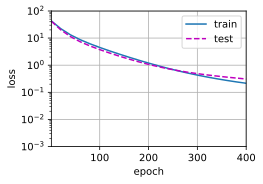

In [40]:
train(poly_features[:n_train,:4],poly_features[n_train:,:4],
      labels[:n_train],labels[n_train:])
#前面4列有权重，训练前面4列

weight: [[3.1378152 4.127122 ]]


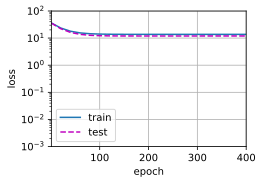

In [42]:
train(poly_features[:n_train,:2],poly_features[n_train:,:2],
      labels[:n_train],labels[n_train:])

weight: [[ 4.7925096   2.0359223  -2.5407887   3.6743205  -2.0040133   1.2781072
  -0.5433702   0.22621663 -0.23924866 -0.09884266  0.15707193  0.03175099
   0.09879889  0.117028    0.1679268  -0.14126684 -0.03694824  0.10866344
   0.0927062   0.13020799]]


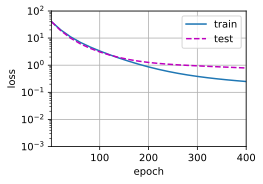

In [44]:
train(poly_features[:n_train,:],poly_features[n_train:,:],
      labels[:n_train],labels[n_train:])